# Classification: Naive Bayes

# Gaussian naive Bayes

* assumption: data from each class/label is drawn from a simple Gaussian distribution (axis-aligned)

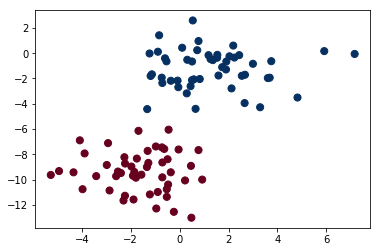

In [1]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

In [2]:
# choose model class
from sklearn.naive_bayes import GaussianNB

# instantiate model
model = GaussianNB()

# fit model
model.fit(X, y)

# predict
y_model = model.predict(X)

In [3]:
import numpy as np
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

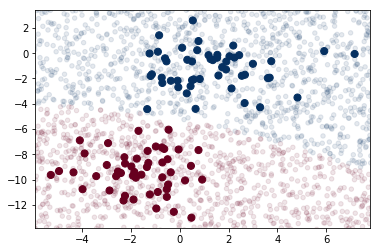

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

* boundary = curved
* usually, boundary in Gaussian naive Bayes = quadratic

In [5]:
# probabilistic classification of L1 and L2
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

### Remark

if: assume that the data is described by a Gaussian distribution 
**with no covariance between dimensions**

then: finding the mean and standard deviation of the points within each label
**simply model**

[(-15, 5), (-8, 8)]

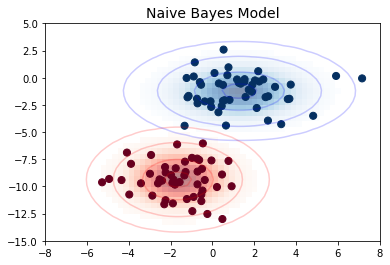

In [6]:
fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

ellipses here represent the Gaussian generative model for each label
with larger probability toward the center of the ellipses

with this generative model in place for each class
we have a simple recipe to compute the likelihood P(features | L1) for any data point

thus we can quickly compute the posterior ratio 
and determine which label is the most probable for a given point